In [1]:
#Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from varclushi import VarClusHi
from collections import Counter

In [2]:
#Reading the csv file into a dataframe
loanData = pd.read_csv('/Users/vibhor/Desktop/Models/LC/Loan_status_2007-2020Q3.gzip', index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#Dimensions of the dataframe
loanData.shape

In [ ]:
loanData.info()

In [ ]:
#only when needed, and delete display after it is shown
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [ ]:
#Columns of the dataframe, do
#loanData.columns #too many columns and so all the cols do not get listed this way
list(loanData.columns) #need to print it as a list

In [ ]:
len(loanData.columns[loanData.isna().any()]) # Except the id column all others have N
#to print them
#loanData.columns[loanData.isna().any().tolist()


In [ ]:
#target variable is loan_status. Understand what values it takes and its corresponding counts
loanData['loan_status'].value_counts()

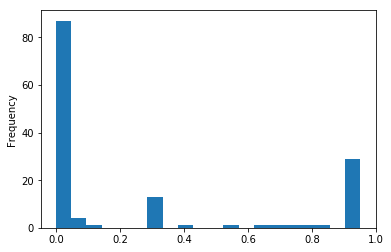

In [3]:
missing_data = loanData.isna().mean() #by variable this returns count(na)/total entries
missing_data.plot.hist(bins=20)

In [4]:
drop_list = list(missing_data[missing_data > 0.2].index)
print("\n\n Drop Features: ", len(drop_list))
drop_list.append('loan_status')
print(drop_list)



 Drop Features:  49
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_a

In [6]:
dropped_data = loanData.loc[:,drop_list] #dataframe of dropped variables. Now checking proportion of loan status where CO (types) NAs are few

In [ ]:
dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()

In [ ]:
loanData['loan_status'].value_counts()

In [ ]:
(loanData['loan_status'].value_counts()[0] + loanData['loan_status'].value_counts()[1]) / loanData['loan_status'].value_counts().sum()

In [ ]:
(dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()[0] + dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()[1]) / dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts().sum()

In [7]:
newdroplist = drop_list
for var in drop_list:
    if var != 'loan_status':
        temp = (dropped_data[dropped_data[var].isna()]['loan_status'].value_counts()[0] + dropped_data[dropped_data[var].isna()]['loan_status'].value_counts()[1]) / dropped_data[dropped_data[var].isna()]['loan_status'].value_counts().sum()
        if temp > 0.86:
            newdroplist.remove(var)
newdroplist.remove('loan_status')
print(newdroplist)
len(newdroplist)


['mths_since_last_record', 'mths_since_last_major_derog', 'dti_joint', 'open_acc_6m', 'open_il_12m', 'mths_since_rcnt_il', 'il_util', 'open_rv_24m', 'all_util', 'total_cu_tl', 'mths_since_recent_bc_dlq', 'revol_bal_joint', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_chargeoff_within_12_mths', 'hardship_type', 'hardship_status', 'hardship_amount', 'hardship_end_date', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount']


24

In [8]:
df_refined = loanData.drop(newdroplist, axis = 1, inplace = False)
df_refined.shape


(2925493, 117)

In [ ]:
#tried to drop rows with NAs but only 1 column has 2 NAs
#droprow_df = loanData.dropna(axis=0, how='any', thresh = 2)
#droprow_df.shape

In [9]:
#counting number of object type (categorical) and numeric and getting a list of those
#Counter(df_refined.dtypes)
num_cols = df_refined._get_numeric_data().columns
cat_cols = list(set(df_refined.columns) - set(num_cols))

In [80]:
df_num = df_refined.loc[:,num_cols]

In [ ]:
num_cols[0]

In [81]:
#new flag
not_problematic = ['Current','Fully Paid']
df_num['statusFlag'] = [0 if x in not_problematic else 1 for x in loanData['loan_status']]

In [ ]:
#understand what is wrong wit this
list_replace = [replaceVal_flag0,replaceVal_flag1]
df_num['loan_amnt'] = df_num.apply(
    lambda list_replace: df_num[df_num['statusFlag']==0]['loan_amnt'].fillna(list_replace[0]) if df_num['statusFlag']==0 
    else df_num[df_num['statusFlag']==1]['loan_amnt'].fillna(list_replace[1])
)

In [12]:
#takes about 15 mins
for var in num_cols:
    if var != 'statusFlag':
        replaceVal_flag0 = df_num[df_num['statusFlag']==0][var].mean()
        replaceVal_flag1 = df_num[df_num['statusFlag']==1][var].mean()

        df_num[df_num['statusFlag']==1][var].fillna(replaceVal_flag1, inplace = True)
        df_num[df_num['statusFlag']==0][var].fillna(replaceVal_flag0, inplace = True)


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [82]:
replaceVal_flag0 = df_num[df_num['statusFlag']==0]['annual_inc'].mean()
replaceVal_flag1 = df_num[df_num['statusFlag']==1]['annual_inc'].mean()

In [88]:
df_num['annual_inc'].where(df_num['statusFlag']==1,df_num['annual_inc'].fillna(replaceVal_flag1))

0          24000.00
1          30000.00
2          12252.00
3          49200.00
4          80000.00
5          36000.00
6          47004.00
7          48000.00
8          40000.00
9          15000.00
10         72000.00
11         75000.00
12         30000.00
13         15000.00
14        100000.00
15         28000.00
16         42000.00
17        110000.00
18         84000.00
19         77385.19
20         43370.00
21        105000.00
22         50000.00
23         50000.00
24         76000.00
25         92000.00
26         60000.00
27         50004.00
28        106000.00
29         25000.00
            ...    
105421     29500.00
105422     49080.01
105423     50000.00
105424    141000.00
105425     49000.00
105426     40000.00
105427     59716.00
105428     98000.00
105429     82360.00
105430    100000.00
105431     35000.00
105432     70000.00
105433     70000.00
105434     45000.00
105435     75000.00
105436     67000.00
105437     65000.00
105438     65400.00
105439     27000.00


In [90]:
df_num['annual_inc'].isna().sum()

5

In [20]:
print("replaceVal_flag0: ", replaceVal_flag0)
print("\nreplaceVal_flag1: ", replaceVal_flag1)

replaceVal_flag0:  81054.43477979732

replaceVal_flag1:  72815.63710491046


In [78]:
listofvars = ['annual_inc','statusFlag']
df_num['annual_inc'].isna().sum()

#df_num[mask]

5

In [73]:
df_num.loc[df_num['annual_inc'].isna(), listofvars]

,annual_inc,statusFlag
39786,NaN,1
42450,NaN,1
42451,NaN,1
42481,NaN,1
42534,NaN,1


In [71]:
#df_num['annual_inc'].fillna(replaceVal_flag1, inplace = True)
pd.DataFrame(df_num[df_num['statusFlag']==1]['annual_inc']).fillna(replaceVal_flag1, inplace = True)

In [72]:
df_num['annual_inc'].isna().any()

True

In [63]:
pd.DataFrame(df_num[df_num['statusFlag']==1]['annual_inc']).head()

,annual_inc
1,30000.0
8,40000.0
9,15000.0
12,30000.0
14,100000.0


# #Clustering

In [ ]:
replaceVal_flag0 = df_num[df_num['statusFlag']==0]['annual_inc'].mean()
replaceVal_flag1 = df_num[df_num['statusFlag']==1]['annual_inc'].mean()
pd.DataFrame(df_num[df_num['statusFlag']==1]['annual_inc']).fillna(replaceVal_flag1, inplace = True)
df_num[df_num['statusFlag']==0]['annual_inc'].fillna(replaceVal_flag0, inplace = True)

In [ ]:
df_num['annual_inc'].isna().any()

In [ ]:
df_num['statusFlag'].value_counts()

In [ ]:
len(df_num['annual_inc'])

In [ ]:
2528799 + 396694

In [ ]:
df_Y = df_num.pop('statusFlag')

In [ ]:
df_num_short = df_num.sample(frac = 0.3)

In [ ]:
loanData_vc = VarClusHi(df_num_short,maxclus=None)

In [ ]:
loanData_vc.varclus()

In [ ]:
loanData_vc.corrs

In [ ]:
loanData_vc.rsquare

In [ ]:
#loanData_vc.info

In [ ]:
not_problematic = ['Current','Fully Paid']
loanData['statusFlag'] = [0 if x in not_problematic else 1 for x in loanData['loan_status']]

In [ ]:
loanData['statusFlag'].value_counts()

#determining cat and num vars
#removing vars that have too many NAs
#clustering
#RF for var select
#IV and WOE


In [ ]:
df_dropped = pd.concat([dropped_data, df_Y], axis=1)